In [1]:
using DataFrames, Distributions, GLM, MLBase, PyPlot, StatsBase, Random


In [2]:
using CSV, RDatasets, StatsPlots, Plots   #Non version Julia 0.4.7 Packages 

# Getting the Data 

we use RDatasets package to get R data set 

--

In [3]:
cars_df = dataset("datasets", "mtcars");

In [4]:
# Lets see the firts 5 rows
first(cars_df, 5)

,Model,MPG,Cyl,Disp,HP,DRat,WT,QSec,VS
,String,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Int64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0
3,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1
4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1
5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0


-----

# Exploratory Data Analysis (EDA)

We need to do some Exploratory Data Analysis first to see what the data frame looks like.

* Describe the data frames
    * column names, 
    * max, mean, median, and min values; 
    * unique values; 
    * missing values; 
    * types of values - tells is categorical, ordinal, and float/int values
* Check for outliers

---

In [5]:
describe(cars_df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Model,,AMC Javelin,,Volvo 142E,32,,String
2,MPG,20.0906,10.4,19.2,33.9,,,Float64
3,Cyl,6.1875,4,6.0,8,,,Int64
4,Disp,230.722,71.1,196.3,472.0,,,Float64
5,HP,146.688,52,123.0,335,,,Int64
6,DRat,3.59656,2.76,3.695,4.93,,,Float64
7,WT,3.21725,1.513,3.325,5.424,,,Float64
8,QSec,17.8487,14.5,17.71,22.9,,,Float64
9,VS,0.4375,0,0.0,1,,,Int64


In [6]:
rows, cols =size(cars_df)
println("Number of rows = $rows ")
println("Number of cols = $cols")

Number of rows = 32 
Number of cols = 12


In [7]:
# check column names to see if there have any unique names. Let's covert column names to lower case
originalNames = names(cars_df);
convertedNames = map(x -> lowercase(x),originalNames); 
rename!(cars_df, Symbol.(convertedNames));

In [8]:
first(cars_df,2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs
,String,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Int64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0


## Outlier Analysis Using Box Plot

BoxPlot to focus on outliers for Depenent Variable Y = Miles Per Gallon (mpg). 

We are trying to predict the miles per gallon values based on dependent variables, the X's (i.e., the other columns of the dataframe

--

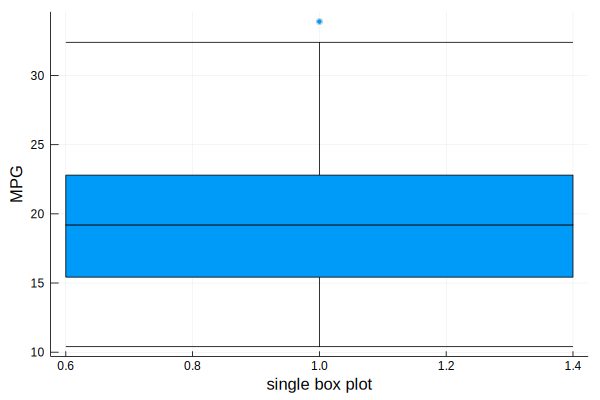

In [9]:
#BoxPlot to find outliers
#boxplot(cars_df[:mpg], title = "Box Plot - Miles per Gallon", ylabel = "Miles Per Gallon (MPG)")
Plots.boxplot(cars_df[!,:mpg], 
                      xlabel ="single box plot", 
                      ylabel = "MPG", legend=false)


# see one outlier in the data set above 

In [10]:
length_before_removal = length(cars_df[!,:mpg])

32

In [11]:
iqr_value = iqr(cars_df[!, :mpg])

7.375

In [12]:
# Outlier value greater than mean + 1.5* IQR value 
cars_df = cars_df[cars_df[!,:mpg] .< (mean(cars_df[!,:mpg]) + 1.5 * iqr_value), :];

In [13]:
# Outlier value greater than mean + 1.5* IQR value 
cars_df[cars_df[!,:mpg] .> (mean(cars_df[!,:mpg]) - 1.5 * iqr_value), :];

In [14]:
length_before_removal = length(cars_df[!,:mpg])

30

## EDA: Distribution Analysis 

We can use density plots to visually inspect for normally distributed data

We could use histograms as well. Look at skewness.

--

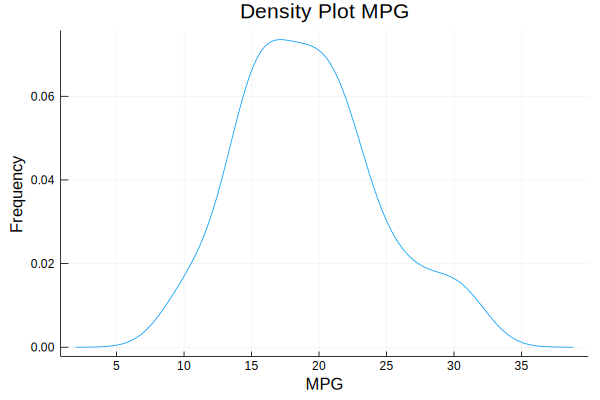

In [15]:
#Density  Plot

density(cars_df[!, :mpg] , title = "Density Plot MPG", 
        ylabel = "Frequency", xlabel = "MPG", legend = false)

## EDA: Correlation Analysis Using Scatter Plots

Linear Regression works well when the y variable is lineary correlated to the x variables. 

We examine the correlation coefficients and scatter pltos 

--

Correlation of MPG with Vehicle/Car Weight (WT) is -0.8789154028439319




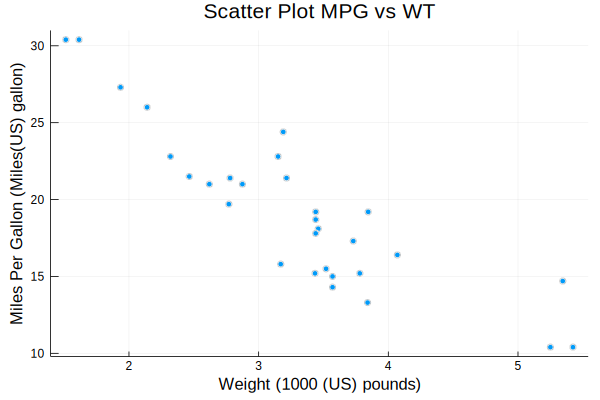

In [16]:
# Correlation Analysis
println("Correlation of MPG with Vehicle/Car Weight (WT) is ", cor(cars_df[!,:wt], cars_df[!,:mpg]), "\n\n")

#Scatter plot with outliers removed.
train_plot = Plots.scatter(cars_df[!,:wt], cars_df[!,:mpg], title = "Scatter Plot MPG vs WT", 
                     ylabel = "Miles Per Gallon (Miles(US) gallon)",
                     xlabel = "Weight (1000 (US) pounds)",
                     legend = false)

-------

-----

# Data Processing Step

* Split Data into test and train sets

test/train ref: https://discourse.julialang.org/t/simple-tool-for-train-test-split/473/2

--

In [17]:
#data is in dataframe form
#at = train percentage

function partitionTrainTest(data, at = 0.7)
    n = nrow(data)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    data[train_idx,:], data[test_idx,:]
end


partitionTrainTest (generic function with 2 methods)

In [18]:
train, test = partitionTrainTest(cars_df, 0.7) # 70% train

(21×12 DataFrame. Omitted printing of 6 columns
│ Row │ model             │ mpg     │ cyl   │ disp    │ hp    │ drat    │
│     │ String            │ Float64 │ Int64 │ Float64 │ Int64 │ Float64 │
├─────┼───────────────────┼─────────┼───────┼─────────┼───────┼─────────┤
│ 1   │ Valiant           │ 18.1    │ 6     │ 225.0   │ 105   │ 2.76    │
│ 2   │ AMC Javelin       │ 15.2    │ 8     │ 304.0   │ 150   │ 3.15    │
│ 3   │ Merc 450SE        │ 16.4    │ 8     │ 275.8   │ 180   │ 3.07    │
│ 4   │ Merc 280C         │ 17.8    │ 6     │ 167.6   │ 123   │ 3.92    │
│ 5   │ Honda Civic       │ 30.4    │ 4     │ 75.7    │ 52    │ 4.93    │
│ 6   │ Camaro Z28        │ 13.3    │ 8     │ 350.0   │ 245   │ 3.73    │
│ 7   │ Merc 240D         │ 24.4    │ 4     │ 146.7   │ 62    │ 3.69    │
│ 8   │ Merc 450SLC       │ 15.2    │ 8     │ 275.8   │ 180   │ 3.07    │
│ 9   │ Dodge Challenger  │ 15.5    │ 8     │ 318.0   │ 150   │ 2.76    │
│ 10  │ Duster 360        │ 14.3    │ 8     │ 360.0   │ 245   │ 

-------

-------

# Building the Linear Regression Model 

Here we are only using the Response/Dependent variable Y, mpg,  and single independent variable, x, weight

We have the following methods with GLM

* `coef`: extract the estimates of the coefficients in the model
* `deviance`: measure of the model fit, weighted residual sum of squares for lm's
* `dof_residual`: degrees of freedom for residuals, when meaningful
* `glm`: fit a generalized linear model (an alias for fit(GeneralizedLinearModel, ...))
* `lm`: fit a linear model (an alias for fit(LinearModel, ...))
* `r2`: R² of a linear model or pseudo-R² of a generalized linear model
* `stderror`: standard errors of the coefficients
* `vcov`: estimated variance-covariance matrix of the coefficient estimates
* `predict` : obtain predicted values of the dependent variable from the fitted model

--

In [19]:
fm = @formula(mpg ~ wt)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

mpg ~ 1 + wt

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  37.3389      2.59215  14.4046     <1e-10   31.9134    42.7643
wt           -5.64862     0.79688  -7.08841    <1e-6    -7.31651   -3.98073
───────────────────────────────────────────────────────────────────────────

### Model Diagnostics



#### The Linear Regression Model (i.e., the equation of the line we derieved using the training dataset)

$y(mpg) = Estimate(intercept) + Estimate(wt) \dot wt$

mpg = 32.9524 - (4.32637) * wt


#### Standard Error  (Std. Error )

Standard Error of the Coefficients

Measure of goodness of fit. The closer to zero the better 

The Std. Error is the standard deviation of the estimate. 

So for example, a 95% confidence interval for the effect on `mpg` due to adding some `weight`
(-4.32637 − 1.96 × 0.573153, -4.32637 + 1.96 × 0.573153) = (). 

The 1.96 comes from a normal distribution table, and is the appropriate value to us to get a 95% confidence interval.

In [20]:
#StdErrorLowerBound =((-4.32637)−(1.96*0.573153));
StdErrorLowerBound = -4.32637-(1.96*0.573153)
StdErrorUpperBound = -4.32637+(1.96*0.573153);
println("$StdErrorLowerBound, $StdErrorUpperBound")

-5.44974988, -3.20299012


#### P-value the (Pr( > |t| )  part)

A variable in linear regression is said to be statistically significant if the `p-value` is less than
a pre-determined statistical significance level, which usually is `0.05`.

In the above case, only one feature is used to build the model. So there would be 2 p-values, one for the feature and one for the intercept. Both of these are less than 0.05, and hence statistically significant (i.e., we want to keep/use them).


#### t-value

The `t value` is the statistic metric calculated by dividing the beta coefficient (weight of the X variable) by its standard error. When I say, standard error, it is an estimate of the deviation of the beta coefficient.

A larger `t-value` indicates that it is less likely that the coefficient is not equal to zero purely by chance. So, the higher the `t-value`, the better.


#### R-Squared - Coefficient of Determination 

`R-Square` is a statistical measure which tells us the proportion of variation in the dependent (y) variable that is explained by different features (independent variables) in this model.


The higher the value of `R-Square`, the better. The max it can go to is 1.

It is rough way to tell how good the model we generated is. If `R-Squared` is close to 1 it means the mode is a good predictor. Means the Sum of Squared Errors (SSE)-- the regression line errors are low so the data ponts mostly sit on the regression line we have drawn

If `R-squared` is close to 0, it means the model is a bad predictor. The regression line does not fit the points well and most will not fall on the line. 


In [21]:
# R Square value of the model - 

r2(linearRegressor)

0.7256142599060103

---
---

# Model Prediction and Performance


Now we are going to look at performance measures of our model

* Mean Absolute Error
* Mean Absolute Percentage Error
* Root Mean Square Error
* Mean Squared Error 
* Error Distribution


##  Prediction 

Now that we have the Linear regression model (i.e., the equation) we can now look at predictions on the test and train data.


In [22]:
# Prediction 
ypredicted_test = predict(linearRegressor, test);
ypredicted_train = predict(linearRegressor, train);


### Calculating the Squared Error

In [23]:
# Test Data  Performance (Computing the Squared error)

performance_testdf = DataFrame(y_actual = test[!,:mpg], y_predicted = ypredicted_test);
performance_testdf[!,:error] = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted];
performance_testdf[!,:error_sq] = performance_testdf[!,:error].^2;


In [24]:
# Train Data  Performance (Computing the Squared error)

performance_traindf = DataFrame(y_actual = train[!,:mpg], y_predicted = ypredicted_train);
performance_traindf[!,:error] = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted];
performance_traindf[!,:error_sq] = performance_traindf[!,:error].^2;


### Mean Absolute Percentage Error (MAPE)

--

In [25]:
#MAPE function
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

### Root Mean Squared Error (RMSE)

--

In [26]:
# RMSE function
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

### Get Error Results from Test data


In [27]:
# Test Errors
println("Mean Absolute Error - MAE (test): ",mean(abs.(performance_testdf[!,:error])), "\n")
println("Mean Absolute Percentage Error - MAPE (Test): ",mape(performance_testdf), "\n")
println("Root Mean Square Error - RMSE (Test): ",rmse(performance_testdf), "\n")
println("Mean Square Error - MSE (Test): ",mean(performance_testdf[!,:error_sq]), "\n")

Mean Absolute Error - MAE (test): 2.66452831842331

Mean Absolute Percentage Error - MAPE (Test): 0.17912734431872082

Root Mean Square Error - RMSE (Test): 3.3432181953293663

Mean Square Error - MSE (Test): 11.177107901581346



### Get Error Results from Test data

In [28]:
# Training Errors
println("Mean Absolute Error - MAE (Train): ",mean(abs.(performance_traindf[!,:error])), "\n")
println("Mean Absolute Percentage Error - MAPE (Train): ",mape(performance_traindf), "\n")
println("Root Mean Square Error - RMSE (Train): ",rmse(performance_traindf), "\n")
println("Mean Square Error - MSE (Train): ",mean(performance_traindf[!,:error_sq]), "\n")

Mean Absolute Error - MAE (Train): 1.8503044414903946

Mean Absolute Percentage Error - MAPE (Train): 0.1007394213803542

Root Mean Square Error - RMSE (Train): 2.223190704962336

Mean Square Error - MSE (Train): 4.942576910630927



### Error Distribution

We need to examine the residual error distribution (i.e. the difference in values betwen predicted and actual y values). 

We want to rule out any patterns to the distribution and see if it follows normal distribution.

We can use a density plot again to visually inspect the distributions to see if they do indeed look linear.



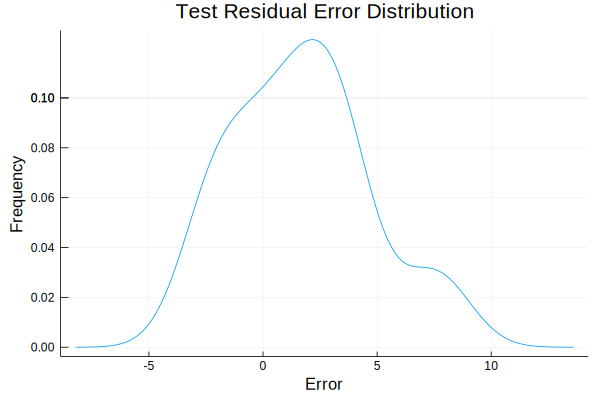

In [29]:
#Distribution Test Residual Error 
density(performance_testdf[!,:error] , 
        title = "Test Residual Error Distribution", 
        ylabel = "Frequency", 
        xlabel = "Error", 
        legend = false)

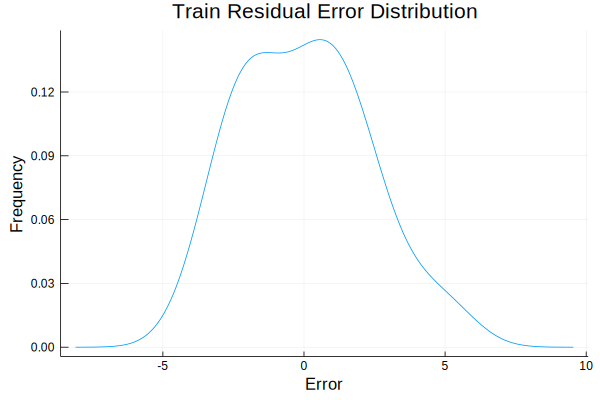

In [30]:
#Distribution Training Residual Error 
# Not exactly normal. 
density(performance_traindf[!,:error] , 
        title = "Train Residual Error Distribution", 
        ylabel = "Frequency", 
        xlabel = "Error", 
        legend = false)

### Scatter Plots of the Predicted and Actual Values 

Here we are looking to see if any patterns emerge.
    

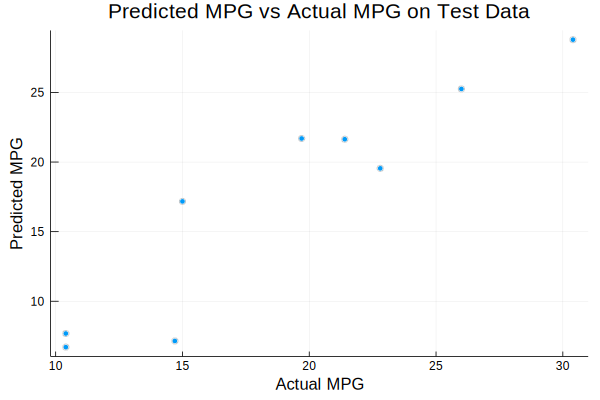

In [31]:
# Scatter Plot of the Actual vs Predicte values of the Test Dataset

test_plot = Plots.scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], 
                    title = "Predicted MPG vs Actual MPG on Test Data", 
                    ylabel = "Predicted MPG", 
                    xlabel = "Actual MPG", 
                    legend = false)

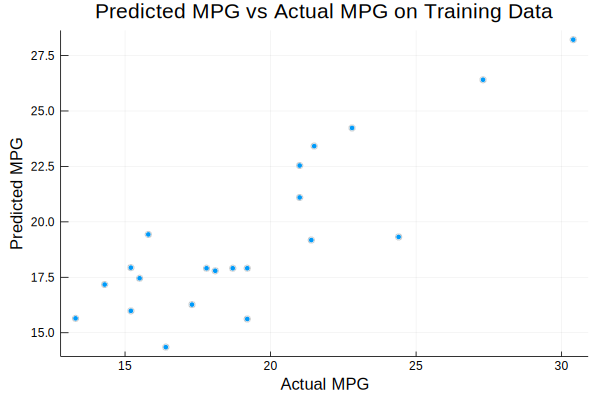

In [32]:
# Scatter Plot of the Actual vs Predicted values of the Training Dataset

train_plot = Plots.scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], 
                    title = "Predicted MPG vs Actual MPG on Training Data", 
                    ylabel = "Predicted MPG", 
                    xlabel = "Actual MPG", 
                    legend = false)

# Some quick conclusions

We see that there is a correlation, but there are points that are not, 
we can show we can do better with multiple regressions
    

---

-----


# Cross Validation

When we want to ensure the good model should perform equally well on new data (X-values) as well as it did on 
training data. 

If performance deteriorates on future new data, we may have overfit our model --- our model is too complex 
and not general enough to perform well. 

So, we `Cross Validate` the models as much as possible. 

`Cross Validation` means to rigorously test the model equation on different mutually exclusive chunks of data.



In [33]:
# Cross Validation Function
#train = training data
# k is the number of folds/test intervals
# fm is the formula for the linear regression

function cross_validation(train,k, fm = @formula(mpg ~ wt))
    a = collect(Kfold(size(train)[1], k))
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:mpg], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf[!,:error] = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
    end
end

cross_validation (generic function with 2 methods)

In [34]:
k = 10 
cross_validation(train,k, fm)

Mean error for set 1 is 3.596762903940265
Mean error for set 2 is 2.014007577888602
Mean error for set 3 is 1.4914058988211476
Mean error for set 4 is 2.569446520177223
Mean error for set 5 is 1.8950735805658585
Mean error for set 6 is 1.722968682996245
Mean error for set 7 is 2.753700575721851
Mean error for set 8 is 1.4602841714331767
Mean error for set 9 is 0.6172586430208185
Mean error for set 10 is 3.7064359935881015


#### Interpreting the Cross Validation
We see that the error varies among each fold and so that can help us to conclude that our model is also not
accurate as we we might like.  We know this probably the case since we did not include some of the other 
X features.



---




----

----
-----


# Multiple Linear Regression 

--


### Rebuilding the regression model using more than one feature. 


```
A data frame with 32 observations on 11 (numeric) variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	Engine (0 = V-shaped, 1 = straight)
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
```


I want to add few more features: cycl, disp, hp, qsec, gear

In [35]:
# Trying this one first
fm2 = @formula(mpg ~ wt  + cyl + hp + gear)
linearRegressor2 = lm(fm2, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

mpg ~ 1 + wt + cyl + hp + gear

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
               Estimate  Std. Error    t value  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  33.5042      5.05527     6.62758     <1e-5   22.7875     44.2209
wt           -3.04627     1.17053    -2.60247     0.0192  -5.52769    -0.564853
cyl          -0.189159    0.65723    -0.287812    0.7772  -1.58242     1.20411
hp           -0.0324597   0.0144535  -2.24581     0.0392  -0.0630997  -0.00181972
gear          0.399709    0.862815    0.463261    0.6494  -1.42938     2.22879
─────────────────────────────────────────────────────────────────────────────────

In [36]:
# See based on P-values that maybe just cyl is the important feature
fm2 = @formula(mpg ~ wt  + cyl)
linearRegressor2 = lm(fm2, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

mpg ~ 1 + wt + cyl

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  37.1536     2.24574   16.544      <1e-11   32.4355   41.8717
wt           -2.97891    1.20316   -2.47591    0.0235   -5.50666  -0.451166
cyl          -1.28613    0.474811  -2.70872    0.0144   -2.28367  -0.288587
───────────────────────────────────────────────────────────────────────────

In [37]:
# R Square value of the model
r2(linearRegressor2)

0.8050710273987173

# Model Prediction and Performance For Multiple Linear Model


Now we are going to look at performance measures of our model

* Mean Absolute Error
* Mean Absolute Percentage Error
* Root Mean Square Error
* Mean Squared Error 
* Error Distribution



##  Prediction 

Now that we have the Linear regression model (i.e., the equation) we can now look at predictions on the test and train data.



In [38]:
# Prediction 
ypredicted_test2 = predict(linearRegressor2, test);
ypredicted_train2 = predict(linearRegressor2, train);

### Calculating the Squared Error

In [39]:
# Test Data  Performance (Computing the Squared error)

performance_testdf2 = DataFrame(y_actual = test[!,:mpg], y_predicted = ypredicted_test2);
performance_testdf2[!,:error] = performance_testdf2[!,:y_actual] - performance_testdf2[!,:y_predicted];
performance_testdf2[!,:error_sq] = performance_testdf2[!,:error].^2;



In [40]:
# Train Data  Performance (Computing the Squared error)

performance_traindf2 = DataFrame(y_actual = train[!,:mpg], y_predicted = ypredicted_train2);
performance_traindf2[!,:error] = performance_traindf2[!,:y_actual] - performance_traindf2[!,:y_predicted];
performance_traindf2[!,:error_sq] = performance_traindf2[!,:error].^2;


### Get Error Results from Test data


In [41]:
# Test Errors
println("Mean Absolute Error - MAE (test): ",mean(abs.(performance_testdf2[!,:error])), "\n")
println("Mean Absolute Percentage Error - MAPE (Test): ",mape(performance_testdf2), "\n")
println("Root Mean Square Error - RMSE (Test): ",rmse(performance_testdf2), "\n")
println("Mean Square Error - MSE (Test): ",mean(performance_testdf2[!,:error_sq]), "\n")

Mean Absolute Error - MAE (test): 1.485674625586726

Mean Absolute Percentage Error - MAPE (Test): 0.08307845859536304

Root Mean Square Error - RMSE (Test): 1.9030703577430237

Mean Square Error - MSE (Test): 3.62167678652016



### Get Error Results from Test data

In [42]:
# Training Errors
println("Mean Absolute Error - MAE (Train): ",mean(abs.(performance_traindf2[!,:error])), "\n")
println("Mean Absolute Percentage Error - MAPE (Train): ",mape(performance_traindf2), "\n")
println("Root Mean Square Error - RMSE (Train): ",rmse(performance_traindf2), "\n")
println("Mean Square Error - MSE (Train): ",mean(performance_traindf2[!,:error_sq]), "\n")

Mean Absolute Error - MAE (Train): 1.6102393931104255

Mean Absolute Percentage Error - MAPE (Train): 0.08512084227986931

Root Mean Square Error - RMSE (Train): 1.8738470799824278

Mean Square Error - MSE (Train): 3.511302879158671



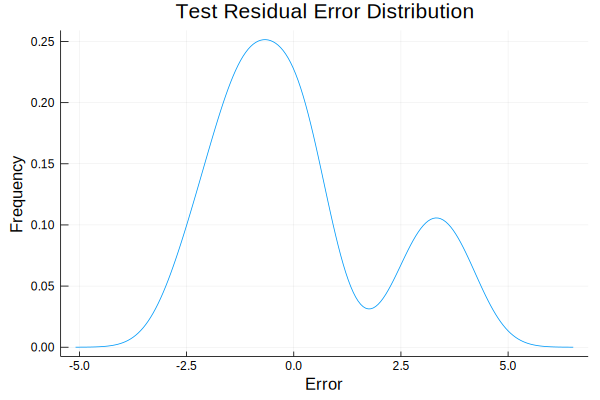

In [43]:
#Distribution Test Residual Error 
density(performance_testdf2[!,:error] , 
        title = "Test Residual Error Distribution", 
        ylabel = "Frequency", 
        xlabel = "Error", 
        legend = false)

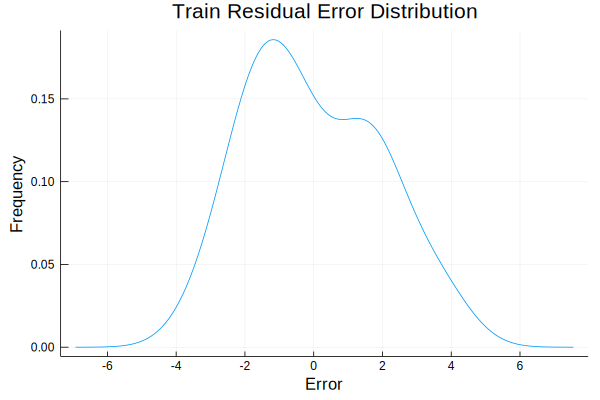

In [44]:
#Distribution Training Residual Error 
# Not exactly normal. 
density(performance_traindf2[!,:error] , 
        title = "Train Residual Error Distribution", 
        ylabel = "Frequency", 
        xlabel = "Error", 
        legend = false)

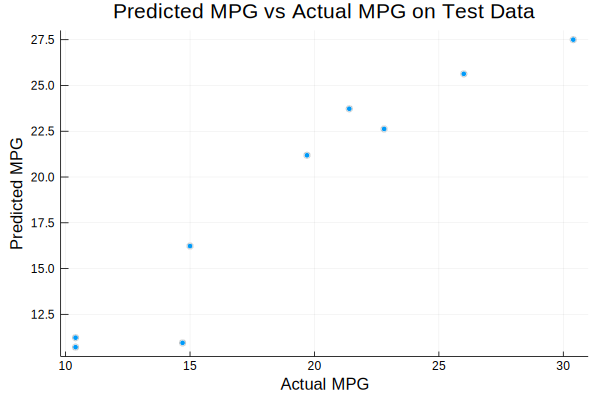

In [45]:
# Scatter Plot of the Actual vs Predicte values of the Test Dataset

test_plot = Plots.scatter(performance_testdf2[!,:y_actual],performance_testdf2[!,:y_predicted], 
                    title = "Predicted MPG vs Actual MPG on Test Data", 
                    ylabel = "Predicted MPG", 
                    xlabel = "Actual MPG", 
                    legend = false)

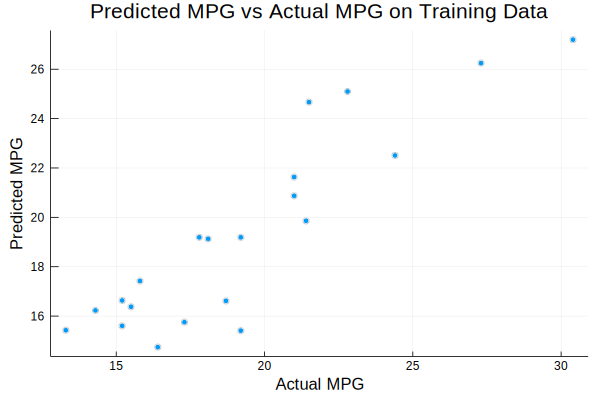

In [46]:
# Scatter Plot of the Actual vs Predicted values of the Training Dataset

train_plot = Plots.scatter(performance_traindf2[!,:y_actual],performance_traindf2[!,:y_predicted], 
                    title = "Predicted MPG vs Actual MPG on Training Data", 
                    ylabel = "Predicted MPG", 
                    xlabel = "Actual MPG", 
                    legend = false)

In [47]:
k = 10 
cross_validation(train,k, fm2)

Mean error for set 1 is 2.2329319807883152
Mean error for set 2 is 2.3785862785862912
Mean error for set 3 is 3.4460662076739457
Mean error for set 4 is 2.018247657257348
Mean error for set 5 is 0.9491888592716071
Mean error for set 6 is 1.857698559074759
Mean error for set 7 is 0.9922167032673261
Mean error for set 8 is 2.3051345705588773
Mean error for set 9 is 1.9048667215849697
Mean error for set 10 is 1.6805902074361772
